<Figure size 432x288 with 0 Axes>

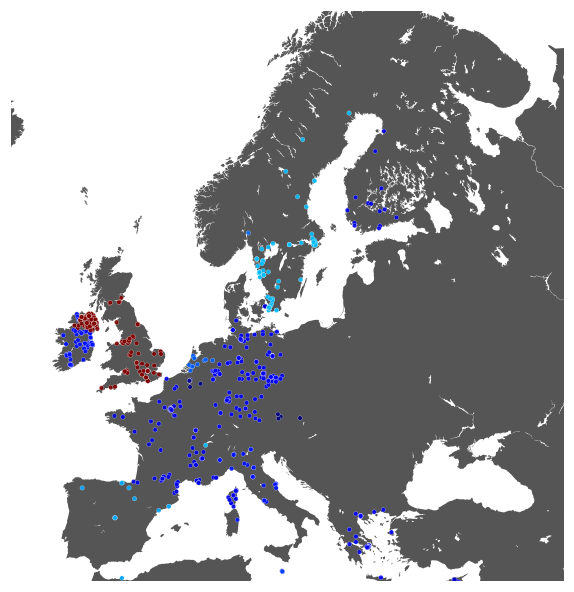

In [19]:
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point, MultiPoint
import pandas as pd
import matplotlib.pyplot as plt
import mplleaflet
import matplotlib.cm as cm
import matplotlib.colors as co

# To display world map
europe = Basemap(
        projection='merc',
        ellps = 'WGS84',
        llcrnrlon=-15, 
        llcrnrlat=35,
        urcrnrlon=45,
        urcrnrlat=70,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)

gtd_dataframe = pd.read_csv('Features pre-processed.csv', 
                            usecols=["country", "region_txt", "longitude", "latitude", "iyear", "nkill", "gname"])
gtd_dataframe.columns

#gtd_dataframe = gtd_dataframe.dropna()
europe_dataframe = gtd_dataframe.loc[gtd_dataframe['region_txt'] == 'Western Europe']

europe_points = pd.Series(
                [Point(europe(mapped_x, mapped_y))
                 for mapped_x, mapped_y in zip(europe_dataframe['longitude'], 
                                               europe_dataframe['latitude'])])

europe_repoints = MultiPoint(list(europe_points.values))

europe_country = europe_dataframe['country']
cmap = plt.cm.jet

europe_norm = co.Normalize(vmin=europe_country.min(), vmax=europe_country.max())
europecolors = plt.cm.ScalarMappable(europe_norm, cmap)
europe_col = europecolors.to_rgba(europe_country)

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='w', frame_on=False)
fig.set_size_inches(18.5, 10.5)

# Create a scatterplot on the map
dev = europe.scatter(
            [geom.x for geom in europe_points],
            [geom.y for geom in europe_points],
            20, marker='o', lw=.25,
            facecolor=europe_col, edgecolor='w',
            alpha=0.9,antialiased=True,
            zorder=3)

europe.fillcontinents(color='#555555')
plt.savefig("europe.png")


<Figure size 432x288 with 0 Axes>

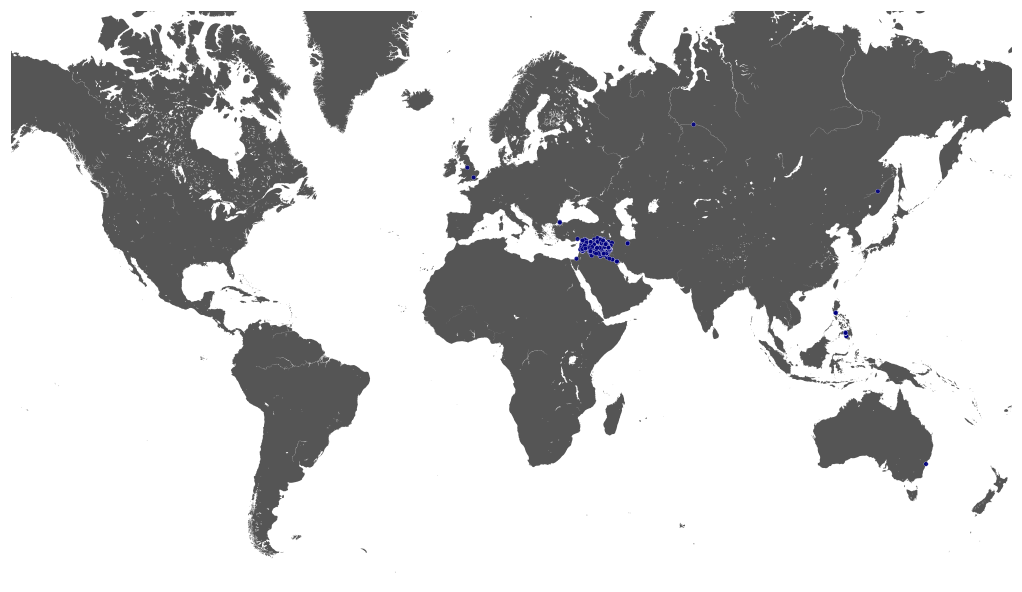

In [28]:
world = Basemap(
        projection='merc',
        ellps = 'WGS84',
        llcrnrlon=-155, 
        llcrnrlat=-60,
        urcrnrlon=180,
        urcrnrlat=75,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)

gtd_year = gtd_dataframe[gtd_dataframe['gname'] == 'Islamic State of Iraq and the Levant (ISIL)']
gtd_year = gtd_year[gtd_year['iyear'] == 2017]

world_points = pd.Series(
                [Point(world(mapped_x, mapped_y)) 
                 for mapped_x, mapped_y in zip(gtd_year['longitude'],
                                               gtd_year['latitude'])])

world_repoints = MultiPoint(list(map_points.values)) 

country = gtd_dataframe['country']
world_year = gtd_year['iyear']
#tree_of_life[tree_of_life['rank'] == 'species'].head()

world_norm = co.Normalize(vmin=world_year.min(), vmax=world_year.max())
world_pointcolors = plt.cm.ScalarMappable(world_norm, cmap)
world_col = world_pointcolors.to_rgba(world_year)

plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='w', frame_on=False)
fig.set_size_inches(18.5, 10.5)

# Create a scatterplot on the map
dev = world.scatter(
            [geom.x for geom in world_points],
            [geom.y for geom in world_points],
            20, marker='o', lw=.25,
            facecolor=world_col, edgecolor='w',
            alpha=0.9,antialiased=True,
            zorder=3)

world.fillcontinents(color='#555555')
plt.savefig("isil2017_world.png")